In [21]:
import pandas as pd
import numpy as np
import datetime

In [22]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

In [23]:
data = pd.read_csv("db.csv")

In [24]:
def sub_to_int(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [25]:
data['channel_subscribers'] = data['channel_subscribers'].apply(sub_to_int)

In [26]:
def view_to_int(x):
    if type(x) == float or type(x) == int:
        return x
    else:
        try:
            return int(x.replace(',',''))
        except:
            try:
                tmp = x.split()
                return int(tmp[0])
            except:
                return 0
        

In [27]:
data['video_views'] = data['video_views'].apply(view_to_int)

In [28]:
channel = pd.DataFrame({'id':data["channel_title"], 'title_length':data["channel_title"].str.len(), 'sub_count':data["channel_subscribers"], 'view':data["video_views"], 'likes':data["video_likes"], 'dislikes':data["video_dislikes"]})
groups = channel.groupby("sub_count").sum()

In [10]:
channel

,id,title_length,sub_count,view,likes,dislikes
0,Ryan Shirley,12,360000.0,6114,379,2
1,Fikri ZamRi,11,111000.0,499314,12840,137
2,touropia,8,731000.0,3667058,34666,506
3,touropia,8,731000.0,4266573,29713,1130
4,Jeniffer Ackerman,17,48500.0,2787575,20471,1450
...,...,...,...,...,...,...
6050,B&H Photo Video,15,818000.0,25896,930,11
6051,Jared Polin,11,1330000.0,105925,4876,257
6052,Kunal Malhotra,14,691000.0,270067,8656,272
6053,Caters Clips,12,2330000.0,30058529,376898,16200


In [29]:
groups

,title_length,view,likes,dislikes
sub_count,,,,
0.0,1022,8021386,78286,3025
1000.0,24,8442,0,0
1040.0,23,603,0,0
1060.0,29,57,0,0
1070.0,51,41005,4,0
...,...,...,...,...
82900000.0,104,3060065965,10061903,4804418
110000000.0,63,36644639,1796911,32610
113000000.0,198,198637304,1991243,99001


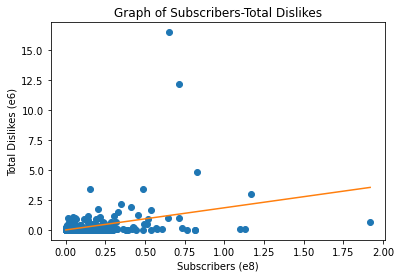

In [30]:
x = groups.index/10**8
y = groups.dislikes/10**6
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.title("Graph of Subscribers-Total Dislikes")
plt.xlabel("Subscribers (e8)")
plt.ylabel("Total Dislikes (e6)")
plt.show()

In [31]:
video = pd.DataFrame({'title_length':data["video_title"].str.len(), 'des_length':data["video_description"].str.len(), 'view':data["video_views"], 'likes':data["video_likes"], 'dislikes':data["video_dislikes"], 'date':data["video_date"], 'comment_length':data["video_comments"].str.len()})
video['date'] = pd.to_datetime(video['date'], format="%d/%m/%Y")


In [33]:
groups_v = video.groupby('title_length').mean()

In [19]:
groups_v

,des_length,view,likes,dislikes,comment_length
title_length,,,,,
4,208.0,3593157.0,142707.0,1829.0,602.0
5,206.0,1244935.0,9884.0,606.0,10.0
6,180.0,2977.0,269.0,3.0,10.0
7,350.5,1044901.5,65200.5,537.5,200.0
8,1031.5,10113798.5,95730.0,3997.0,10.0
...,...,...,...,...,...
135,1472.0,1833.0,344.0,4.0,480.0
141,2029.0,290865.0,4032.0,245.0,522.0
143,1617.0,98040.0,2887.0,89.0,508.0


Text(0, 0.5, 'Average Views')

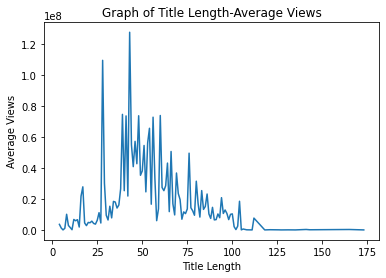

In [34]:
x=groups_v.index
y= groups_v.view
plt.plot(x, y)
plt.title("Graph of Title Length-Average Views")
plt.xlabel("Title Length")
plt.ylabel("Average Views")

In [35]:
channel2 = pd.DataFrame({'title_length':data["channel_title"].str.len(), 'sub_count':data["channel_subscribers"], 'des_length':data["video_description"].str.len(), 'view':data["video_views"], 'likes':data["video_likes"], 'dislikes':data["video_dislikes"], 'comment_length':data["video_comments"].str.len()})
groups2 = channel2.groupby("des_length").sum()

In [36]:
groups_v2 = video.groupby('date').sum()

In [37]:
groups_v2

,title_length,des_length,view,likes,dislikes,comment_length
date,,,,,,
2006-07-22,38,62.0,37270211,130890,3348,369
2007-03-05,41,2541.0,1662622860,10542038,239981,464
2007-05-14,42,2504.0,223550046,1303910,32710,453
2007-10-13,34,121.0,13534139,124663,6346,496
2007-12-04,31,139.0,975861,7877,173,544
...,...,...,...,...,...,...
2021-09-01,8291,169850.0,36320906,1760882,36907,72673
2021-09-02,13408,252233.0,40053283,1177677,27942,109864
2021-09-03,22385,398303.0,25292767,1388648,29009,158778


Text(0, 0.5, 'Reactions per View')

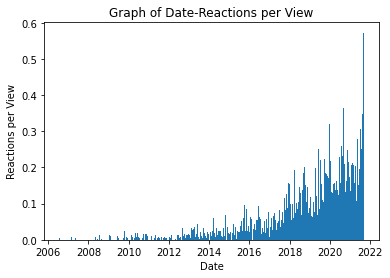

In [38]:
x=groups_v2.index
y=(groups_v2.likes + groups_v2.dislikes)/groups_v2.view
plt.hist(x, 500, weights=y)
plt.title("Graph of Date-Reactions per View")
plt.xlabel("Date")
plt.ylabel("Reactions per View")